In [1]:
from pyspark.sql import SparkSession

MAX_MEMORY='8g'
spark=SparkSession.builder.appName("HR-Employee-Attrition-Analysis")\
                          .config('spark.driver.memory',MAX_MEMORY)\
                          .config('spark.executor.memory',MAX_MEMORY)\
                          .getOrCreate()


In [2]:
import os
cwd = os.getcwd()
data_path = os.path.join(cwd, 'learning_spark_data', 'WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(data_path)

/home/jovyan/work/learning_spark_data/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
file_path=f"file:///{data_path.replace(os.sep,'/')}"
file_path

'file:////home/jovyan/work/learning_spark_data/WA_Fn-UseC_-HR-Employee-Attrition.csv'

## DataFrame 읽기

In [4]:

hr_df=spark.read.csv(file_path, header=True, inferSchema=True)
hr_df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

| 컬럼명                   | 간단 설명                                             |
|--------------------------|------------------------------------------------------|
| Age                      | 나이                                                 |
| Attrition                | 이직 여부 (Yes/No)                                   |
| BusinessTravel           | 출장 빈도 (Rarely, Frequently 등)                    |
| DailyRate                | 일일 급여                                            |
| Department               | 부서 (Sales, R&D 등)                                 |
| DistanceFromHome         | 집-회사 거리(마일)                                   |
| Education                | 교육 수준(1~5 단계)                                  |
| EducationField           | 전공 분야 (Life Sciences 등)                         |
| EmployeeCount            | 직원 수(항상 1, 의미 없음)                          |
| EmployeeNumber           | 직원 고유번호(식별자)                                |
| EnvironmentSatisfaction  | 근무 환경 만족도(1~4)                                |
| Gender                   | 성별                                                |
| HourlyRate               | 시급                                                |
| JobInvolvement           | 직무 몰입도(1~4)                                    |
| JobLevel                 | 직급(1~5)                                           |
| JobRole                  | 직무명(연구원, 영업, 관리자 등)                     |
| JobSatisfaction          | 직무 만족도(1~4)                                    |
| MaritalStatus            | 결혼 상태(기혼/미혼/이혼 등)                        |
| MonthlyIncome            | 월급                                                |
| MonthlyRate              | 월 급여율(내부 계산용)                              |
| NumCompaniesWorked       | 이직 전 근무 회사 수                                 |
| Over18                   | 18세 이상 여부(항상 Y, 의미 없음)                   |
| OverTime                 | 초과근무(야근) 여부(Yes/No)                         |
| PercentSalaryHike        | 급여 인상률(%)                                       |
| PerformanceRating        | 근무 성과평가(1~4, 거의 다 3~4)                      |
| RelationshipSatisfaction | 대인 관계 만족도(1~4)                                |
| StandardHours            | 표준 근무시간(항상 80, 의미 없음)                   |
| StockOptionLevel         | 스톡옵션 지급수준(0~3)                               |
| TotalWorkingYears        | 총 근무 경력(년)                                     |
| TrainingTimesLastYear    | 1년간 교육 이수 횟수                                 |
| WorkLifeBalance          | 일과 삶 균형(1~4)                                    |
| YearsAtCompany           | 현 회사 근무 연수(년)                                |
| YearsInCurrentRole       | 현 직무 연수(년)                                     |
| YearsSinceLastPromotion  | 최근 승진 이후 연수(년)                              |
| YearsWithCurrManager     | 현재 상사와 함께한 연수(년)                          |


## 전처리 전 체크

In [5]:
# 행/열 수 확인
print(f"Row count: {hr_df.count()}, Column count: {len(hr_df.columns)}")

Row count: 1470, Column count: 35


In [6]:
# PySpark → Pandas 변환
desc_pd = hr_df.describe().toPandas()
display(desc_pd)  # Jupyter 환경이면 표로 보여줌

,summary,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,count,1470,1470,1470,1470,1470,1470,1470,1470,1470,...,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
1,mean,36.923809523809524,None,None,802.4857142857143,None,9.19251700680272,2.912925170068027,None,1.0,...,2.7122448979591836,80.0,0.7938775510204081,11.279591836734694,2.7993197278911564,2.7612244897959184,7.0081632653061225,4.229251700680272,2.1877551020408164,4.12312925170068
2,stddev,9.135373489136729,None,None,403.50909994352804,None,8.10686443566608,1.0241649445978718,None,0.0,...,1.0812088864403517,0.0,0.8520766679308381,7.780781675514995,1.2892706207958466,0.7064758297141507,6.126525152403571,3.623137034670627,3.2224302791379693,3.5681361205404363
3,min,18,No,Non-Travel,102,Human Resources,1,1,Human Resources,1,...,1,80,0,0,0,1,0,0,0,0
4,max,60,Yes,Travel_Rarely,1499,Sales,29,5,Technical Degree,1,...,4,80,3,40,6,4,40,18,15,17


In [7]:
# 데이터 타입이 문자열(StringType)인 컬럼만 추출

from pyspark.sql.types import StringType

cat_cols = [f.name for f in hr_df.schema.fields if isinstance(f.dataType, StringType)]
print(cat_cols)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


| 구분                    | 컬럼명                                                      | 간단 설명                                 |
|-------------------------|-------------------------------------------------------------|-------------------------------------------|
| **전처리(인코딩) 대상** | Department, JobRole, Gender, OverTime, MaritalStatus,        | 부서, 직무, 성별, 야근, 결혼상태,         |
|                         | EducationField, BusinessTravel                              | 전공, 출장 변수         |

## 필수 컬럼 추출(SQL 쿼리)

In [8]:
hr_df.createOrReplaceTempView('hr_data')

query = """
SELECT 
    Age,
    DailyRate,
    DistanceFromHome,
    HourlyRate,
    JobLevel,
    MonthlyIncome,
    MonthlyRate,
    NumCompaniesWorked,
    PercentSalaryHike,
    TotalWorkingYears,
    TrainingTimesLastYear,
    YearsAtCompany,
    YearsInCurrentRole,
    YearsSinceLastPromotion,
    YearsWithCurrManager,
    Gender,
    MaritalStatus,
    Department,
    JobRole,
    OverTime,
    EducationField,
    BusinessTravel,
    Attrition
FROM hr_data
 
 WHERE Age > 18
  AND MonthlyIncome > 0
  AND YearsAtCompany >= 0
  AND TotalWorkingYears >= 0
  AND Attrition IN ('Yes', 'No')
  AND Age IS NOT NULL
  AND MonthlyIncome IS NOT NULL
  AND YearsAtCompany IS NOT NULL
  AND TotalWorkingYears IS NOT NULL
"""

filtered_hr_df = spark.sql(query)
filtered_hr_df.show(5)

+---+---------+----------------+----------+--------+-------------+-----------+------------------+-----------------+-----------------+---------------------+--------------+------------------+-----------------------+--------------------+------+-------------+--------------------+--------------------+--------+--------------+-----------------+---------+
|Age|DailyRate|DistanceFromHome|HourlyRate|JobLevel|MonthlyIncome|MonthlyRate|NumCompaniesWorked|PercentSalaryHike|TotalWorkingYears|TrainingTimesLastYear|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPromotion|YearsWithCurrManager|Gender|MaritalStatus|          Department|             JobRole|OverTime|EducationField|   BusinessTravel|Attrition|
+---+---------+----------------+----------+--------+-------------+-----------+------------------+-----------------+-----------------+---------------------+--------------+------------------+-----------------------+--------------------+------+-------------+--------------------+--------------------+---

## 전처리

In [9]:
# 2. 수치형(연속형) 변수 리스트 (Imputer, 스케일링 등 전처리용)
num_features = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'HourlyRate',
    'JobLevel',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# 3. 범주형(카테고리) 변수 리스트 (인코딩용)
cat_features = [
    'Gender',
    'MaritalStatus',
    'Department',
    'JobRole',
    'OverTime',
    'EducationField',
    'BusinessTravel'
]

# 4. 타깃 변수
target_col = 'Attrition'

In [10]:
from pyspark.sql.functions import col, sum, when

# 컬럼별 결측치 개수 딕셔너리로 추출
null_counts = {
    c: filtered_hr_df.filter(col(c).isNull()).count()
    for c in filtered_hr_df.columns
}

# 결측치가 1개 이상인 컬럼만 추출
null_cols = [col for col, cnt in null_counts.items() if cnt > 0]
print(f"결측치가 1개 이상 있는 컬럼: {null_cols}")


결측치가 1개 이상 있는 컬럼: []


## 범주형 변수 인코딩

In [11]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

#1. 범주형 변수 리스트 한번 더 지정
cat_features = [
    'Gender',
    'MaritalStatus',
    'Department',
    'JobRole',
    'OverTime',
    'EducationField',
    'BusinessTravel'
]

#2. 인코더 스테이지 리스트 생성
stages= []

# 2-1. StringIndexer (문자->숫자)
for col_name in cat_features:
    indexer=StringIndexer(
        inputCol=col_name,
        outputCol=col_name+ "_idx",
        handleInvalid='skip' #결측, 미지정값도 인코딩
    )
    stages.append(indexer)

#2-2. 원핫인코딩(라벨->벡터)
onehot_encoder=OneHotEncoder(
    inputCols=[col+"_idx" for col in cat_features],
    outputCols=[col + "onehot" for col in cat_features]

)
stages.append(onehot_encoder)



## 파이프 라인 구축

In [12]:
# 파이프라인 생성 및 변환
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=stages)
onehot_model = pipeline.fit(filtered_hr_df)  
encoded_df = onehot_model.transform(filtered_hr_df)  

# 3. 결과 확인 (벡터 컬럼 일부)
onehot_cols = [
    "Genderonehot", "MaritalStatusonehot", "Departmentonehot",
    "JobRoleonehot", "OverTimeonehot", "EducationFieldonehot", "BusinessTravelonehot"
]
encoded_df.select(onehot_cols).show(3, truncate=False)

+-------------+-------------------+----------------+-------------+--------------+--------------------+--------------------+
|Genderonehot |MaritalStatusonehot|Departmentonehot|JobRoleonehot|OverTimeonehot|EducationFieldonehot|BusinessTravelonehot|
+-------------+-------------------+----------------+-------------+--------------+--------------------+--------------------+
|(1,[],[])    |(2,[1],[1.0])      |(2,[1],[1.0])   |(8,[0],[1.0])|(1,[],[])     |(5,[0],[1.0])       |(2,[0],[1.0])       |
|(1,[0],[1.0])|(2,[0],[1.0])      |(2,[0],[1.0])   |(8,[1],[1.0])|(1,[0],[1.0]) |(5,[0],[1.0])       |(2,[1],[1.0])       |
|(1,[0],[1.0])|(2,[1],[1.0])      |(2,[0],[1.0])   |(8,[2],[1.0])|(1,[],[])     |(5,[4],[1.0])       |(2,[0],[1.0])       |
+-------------+-------------------+----------------+-------------+--------------+--------------------+--------------------+
only showing top 3 rows



In [13]:
from pyspark.ml.feature import VectorAssembler

#1. 수치형 피쳐 + 원한인코딩 컬럼명 합치기
assembler_input= num_features+ onehot_cols

#2. VectorAssembler로 feature_vector 생성
assembler= VectorAssembler(
    inputCols=assembler_input,
    outputCol="feature_vector"
)

final_df=assembler.transform(encoded_df)

#3. 결과 구조 확인
final_df.select("feature_vector").show(3, truncate=False)
final_df.printSchema()

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|feature_vector                                                                                                                                                        |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(36,[0,1,2,3,4,5,6,7,8,9,11,12,14,17,19,20,29,34],[41.0,1102.0,1.0,94.0,2.0,5993.0,19479.0,8.0,11.0,8.0,6.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0])                             |
|(36,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,21,28,29,35],[49.0,279.0,8.0,61.0,2.0,5130.0,24907.0,1.0,23.0,10.0,3.0,10.0,7.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|(36,[0,1,2,3,4,5,6,7,8,9,10,15,17,18,22,33,34],[37.0,1373.0,2.0,92.0,1.0,2090.0,2396.0,6.0,15.0,7.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0])                         

## 타깃 변수(Attrition) 인코딩

#### 1. 3개의 클래스로 다중분류로 인식되는걸 조심하기
#### 2. 클래수 개수만큼 벡터가 만들어지는거 유의하기

In [14]:
from pyspark.ml.feature import StringIndexer

label_indexer = StringIndexer(
    inputCol="Attrition", 
    outputCol="label", 
    handleInvalid="skip"
)
final_df_with_label = label_indexer.fit(final_df).transform(final_df)

#label에서 null/NaN/이상값 완전 제거
final_df_with_label = final_df_with_label.filter("label in (0, 1)")
final_df_with_label = final_df_with_label.filter("label is not null")

# label 컬럼(이진값) 생성 확인
final_df_with_label.select("Attrition", "label").show(5)

+---------+-----+
|Attrition|label|
+---------+-----+
|      Yes|  1.0|
|       No|  0.0|
|      Yes|  1.0|
|       No|  0.0|
|       No|  0.0|
+---------+-----+
only showing top 5 rows



In [15]:
final_df_with_label.select("label").distinct().show()

+-----+
|label|
+-----+
|  0.0|
|  1.0|
+-----+



## 학습/테스트 데이터 분할

In [16]:
train_df, test_df = final_df_with_label.randomSplit([0.8, 0.2], seed=42)
print("Train size:", train_df.count())
print("Test size:", test_df.count())

Train size: 1209
Test size: 253


## 모델 객체 생성 및 학습

In [17]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

rf = RandomForestClassifier(
    featuresCol="feature_vector", 
    labelCol="label",
    predictionCol="prediction",
    probabilityCol="probability",
    seed=42
)

rf_model = rf.fit(train_df)

## 예측 및 결과 확인

In [21]:
from pyspark.ml.feature import OneHotEncoderModel

# 올바르게 파이프라인 모델에서 OneHotEncoderModel 추출
ohe_models = [s for s in onehot_model.stages if isinstance(s, OneHotEncoderModel)]
category_sizes = []
for ohe_model in ohe_models:
    category_sizes += ohe_model.categorySizes

feature_names = []
feature_names += num_features  # ex: ['Age', ...]
for col, n in zip(cat_features, category_sizes):
    for i in range(n-1):
        feature_names.append(f"{col}_onehot_{i}")

importances = rf_model.featureImportances.toArray()
assert len(feature_names) == len(importances)



In [23]:
predictions = rf_model.transform(test_df)
predictions.select("Attrition", "label", "prediction", "probability").show(10, truncate=False)

+---------+-----+----------+----------------------------------------+
|Attrition|label|prediction|probability                             |
+---------+-----+----------+----------------------------------------+
|Yes      |1.0  |1.0       |[0.42381792507495175,0.5761820749250484]|
|Yes      |1.0  |1.0       |[0.490022072823983,0.509977927176017]   |
|No       |0.0  |0.0       |[0.503393552337559,0.49660644766244105] |
|Yes      |1.0  |0.0       |[0.5515562321730886,0.4484437678269114] |
|Yes      |1.0  |0.0       |[0.5621894328294144,0.4378105671705856] |
|No       |0.0  |0.0       |[0.5241986829667853,0.47580131703321477]|
|No       |0.0  |0.0       |[0.7609113555232065,0.23908864447679337]|
|Yes      |1.0  |1.0       |[0.4118411419387512,0.5881588580612488] |
|Yes      |1.0  |0.0       |[0.5498105159205136,0.4501894840794864] |
|No       |0.0  |0.0       |[0.8986399034813225,0.10136009651867754]|
+---------+-----+----------+----------------------------------------+
only showing top 10 

## 평가지표(정확도, ROC-AUC)

In [24]:
evaluator = BinaryClassificationEvaluator(
    labelCol="label", 
    rawPredictionCol="probability",  # probability or rawPrediction
    metricName="areaUnderROC"
)

roc_auc = evaluator.evaluate(predictions)
print(f"ROC-AUC: {roc_auc:.4f}")

# 정확도
accuracy = predictions.filter("label = prediction").count() / predictions.count()
print(f"Accuracy: {accuracy:.4f}")

ROC-AUC: 0.7077
Accuracy: 0.8379


In [20]:
#print("Train labels:", train_df.select("label").distinct().rdd.flatMap(lambda x: x).collect())
#print("Test labels:", test_df.select("label").distinct().rdd.flatMap(lambda x: x).collect())

Train labels: [0.0, 1.0]
Test labels: [0.0, 1.0]


## 시각화

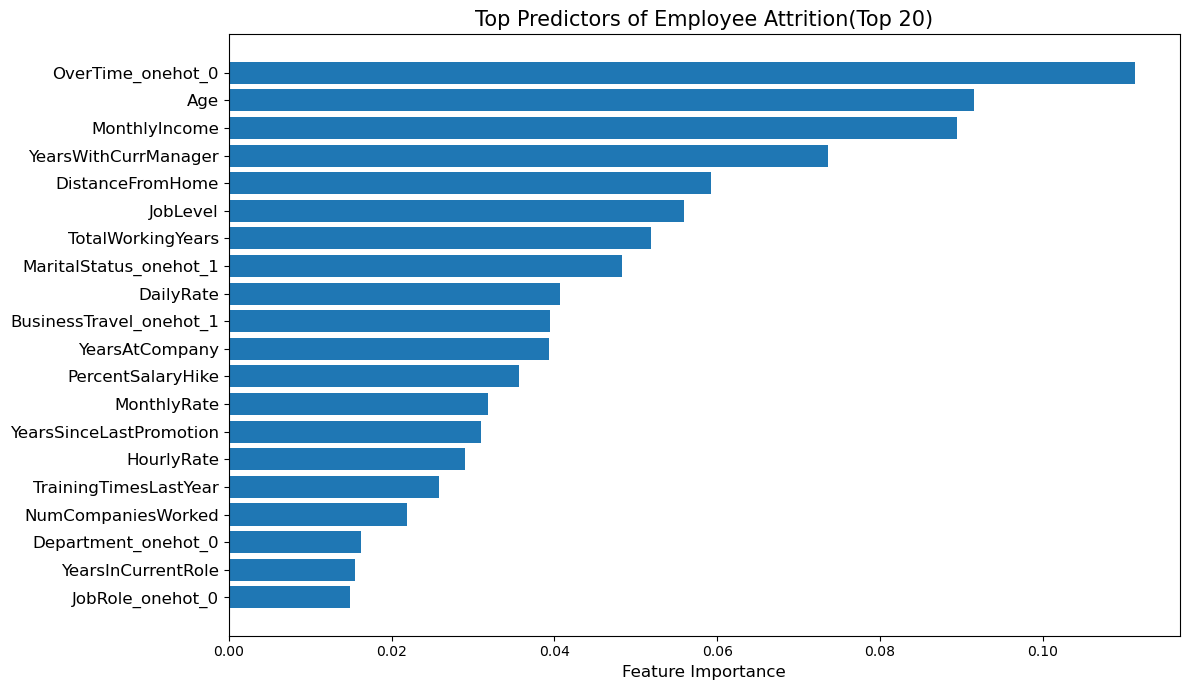

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# feature_names, importances는 앞서 구한 값 사용
indices = np.argsort(importances)[::-1][:20]  # Top 20

plt.figure(figsize=(12, 7))
plt.barh(range(20), importances[indices][::-1])
plt.yticks(range(20), [feature_names[i] for i in indices][::-1], fontsize=12)
plt.xlabel("Feature Importance", fontsize=12)
plt.title("Top Predictors of Employee Attrition(Top 20)", fontsize=15) #주요 퇴사 예측 변수
plt.tight_layout()
plt.show()

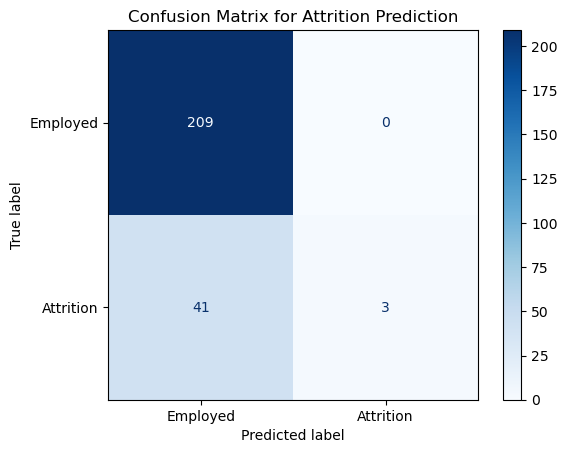

In [34]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.functions import vector_to_array

# 예측
predictions = rf_model.transform(test_df)
# Pandas로 변환
y_true = predictions.select("label").toPandas()
y_pred = predictions.select("prediction").toPandas()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Employed", "Attrition"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Attrition Prediction")
plt.show()

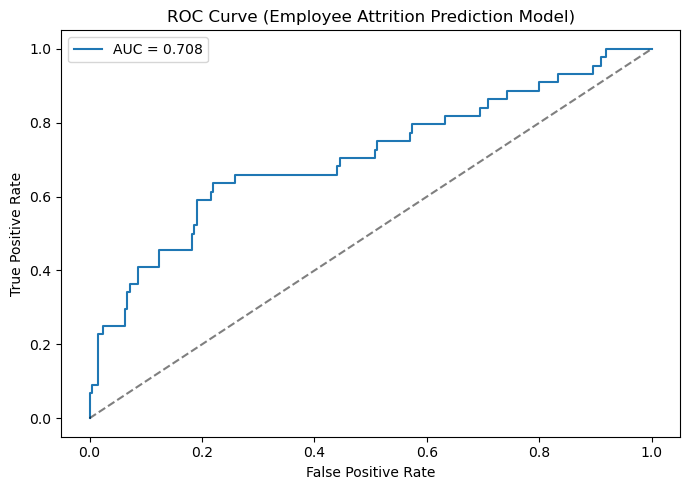

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 예측 확률(퇴사일 확률)
y_score = np.array(predictions.select("probability").rdd.map(lambda x: x[0][1]).collect())

fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc = roc_auc_score(y_true, y_score)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'k--',alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Employee Attrition Prediction Model)") #퇴사 예측 모델
plt.legend()
plt.tight_layout()
plt.show()

## 하이퍼파라미터

## 1. GBTClassifier 모델 학습

In [46]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# 1. 모델 객체 생성
gbt = GBTClassifier(
    featuresCol="feature_vector",
    labelCol="label",
    predictionCol="prediction",
    seed=42
)

# 2. 파라미터 그리드 설정
paramGrid = (
    ParamGridBuilder()
        .addGrid(gbt.maxIter, [30, 50, 70])       # 트리 개수
        .addGrid(gbt.maxDepth, [3, 5, 7])         # 트리 깊이
        .addGrid(gbt.stepSize, [0.05, 0.1, 0.2])  # 학습률
        .build()
)

# 3. 평가 지표
evaluator = BinaryClassificationEvaluator(
    labelCol="label",
    rawPredictionCol="rawPrediction",
    metricName="areaUnderROC"
)

# 4. 교차검증 세팅
cv = CrossValidator(
    estimator=gbt,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=3,
    parallelism=2
)

# 5. 교차검증 학습
cvModel = cv.fit(train_df)

# 6. 최적 모델로 테스트 예측
bestModel = cvModel.bestModel
predictions = bestModel.transform(test_df)

# 7. 성능 출력
auc = evaluator.evaluate(predictions)
print(f"튜닝된 GBTClassifier ROC-AUC: {auc:.3f}")

# 8. 최적 파라미터 확인
print("Best Params:", bestModel.extractParamMap())


튜닝된 GBTClassifier ROC-AUC: 0.702
Best Params: {Param(parent='GBTClassifier_b839020b4408', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False, Param(parent='GBTClassifier_b839020b4408', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext.'): 10, Param(parent='GBTClassifier_b839020b4408', name='featureSubsetStrategy', doc="The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt

In [47]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# 정확도 계산
evaluator_acc = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="accuracy"
)

accuracy = evaluator_acc.evaluate(predictions)  # predictions: 예측 결과 DataFrame
print(f"정확도(Accuracy): {accuracy:.3f}")

정확도(Accuracy): 0.842


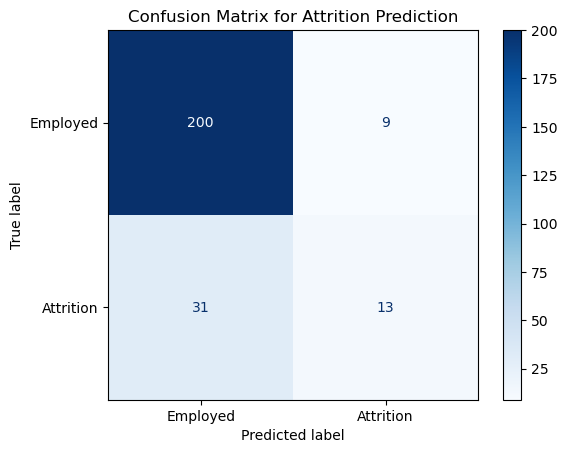

In [51]:
import warnings
warnings.filterwarnings('ignore')

# 예측 결과 DataFrame에서 실제값, 예측값 추출
y_true = predictions.select("label").toPandas()
y_pred = predictions.select("prediction").toPandas()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 혼동행렬 계산
cm = confusion_matrix(y_true, y_pred)

# 한글 라벨 지정(예: 0=재직, 1=퇴사)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Employed", "Attrition"]  # 또는 ["Employed", "Attrition"]
)

# 시각화 출력
import matplotlib.pyplot as plt
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Attrition Prediction")
plt.show()